Tidak ada output 'stres' dalam simulasi.


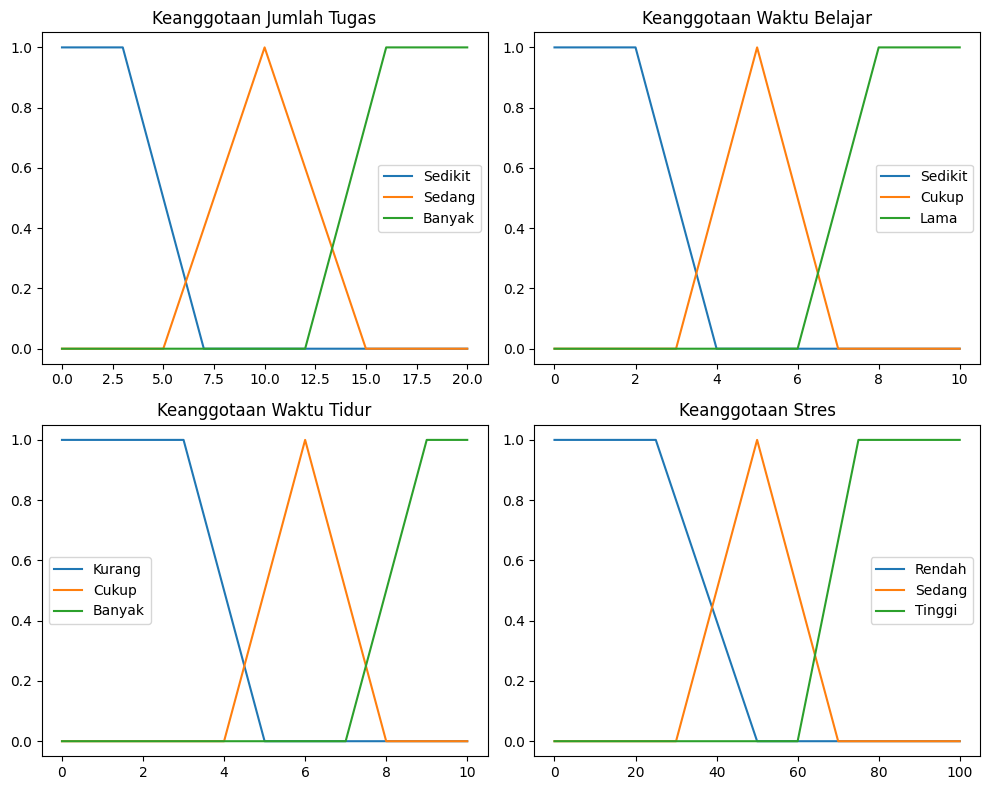

In [26]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Mendefinisikan variabel fuzzy
jumlah_tugas = ctrl.Antecedent(np.arange(0, 21, 1), 'jumlah_tugas')
waktu_belajar = ctrl.Antecedent(np.arange(0, 11, 1), 'waktu_belajar')
waktu_tidur = ctrl.Antecedent(np.arange(0, 11, 1), 'waktu_tidur')
stres = ctrl.Consequent(np.arange(0, 101, 1), 'stres')

# Fungsi keanggotaan
jumlah_tugas['sedikit'] = fuzz.trapmf(jumlah_tugas.universe, [0, 0, 3, 7])
jumlah_tugas['sedang'] = fuzz.trimf(jumlah_tugas.universe, [5, 10, 15])
jumlah_tugas['banyak'] = fuzz.trapmf(jumlah_tugas.universe, [12, 16, 20, 20])

waktu_belajar['sedikit'] = fuzz.trapmf(waktu_belajar.universe, [0, 0, 2, 4])
waktu_belajar['cukup'] = fuzz.trimf(waktu_belajar.universe, [3, 5, 7])
waktu_belajar['lama'] = fuzz.trapmf(waktu_belajar.universe, [6, 8, 10, 10])

waktu_tidur['kurang'] = fuzz.trapmf(waktu_tidur.universe, [0, 0, 3, 5])
waktu_tidur['cukup'] = fuzz.trimf(waktu_tidur.universe, [4, 6, 8])
waktu_tidur['banyak'] = fuzz.trapmf(waktu_tidur.universe, [7, 9, 10, 10])

stres['rendah'] = fuzz.trapmf(stres.universe, [0, 0, 25, 50])
stres['sedang'] = fuzz.trimf(stres.universe, [30, 50, 70])
stres['tinggi'] = fuzz.trapmf(stres.universe, [60, 75, 100, 100])

# Menambahkan lebih banyak aturan untuk menangani kombinasi keanggotaan
rule1 = ctrl.Rule(jumlah_tugas['sedikit'] & waktu_belajar['sedikit'] & waktu_tidur['banyak'], stres['rendah'])
rule2 = ctrl.Rule(jumlah_tugas['sedang'] & waktu_belajar['cukup'] & waktu_tidur['cukup'], stres['sedang'])
rule3 = ctrl.Rule(jumlah_tugas['banyak'] & waktu_belajar['lama'] & waktu_tidur['kurang'], stres['tinggi'])
rule4 = ctrl.Rule(jumlah_tugas['sedikit'] & waktu_tidur['kurang'], stres['sedang'])
rule5 = ctrl.Rule(jumlah_tugas['banyak'] & waktu_belajar['cukup'], stres['tinggi'])

# Menambahkan aturan yang lebih fleksibel
rule6 = ctrl.Rule(jumlah_tugas['sedang'] & waktu_belajar['cukup'] & waktu_tidur['banyak'], stres['sedang'])
rule7 = ctrl.Rule(jumlah_tugas['sedikit'] & waktu_belajar['lama'] & waktu_tidur['cukup'], stres['sedang'])
rule8 = ctrl.Rule(jumlah_tugas['banyak'] & waktu_belajar['sedikit'] & waktu_tidur['cukup'], stres['tinggi'])
rule9 = ctrl.Rule(jumlah_tugas['sedang'] & waktu_belajar['lama'] & waktu_tidur['kurang'], stres['tinggi'])

# Membuat sistem kontrol dengan lebih banyak aturan
stres_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
stres_simulation = ctrl.ControlSystemSimulation(stres_ctrl)

# Input contoh
stres_simulation.input['jumlah_tugas'] = 10
stres_simulation.input['waktu_belajar'] = 6
stres_simulation.input['waktu_tidur'] = 4

# Menghitung hasil
stres_simulation.compute()

# Menampilkan hasil
if 'stres' in stres_simulation.output:
    print(f"Nilai Stres: {stres_simulation.output['stres']}")
else:
    print("Tidak ada output 'stres' dalam simulasi.")

# Plot keanggotaan
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Plot keanggotaan jumlah_tugas
axes[0, 0].plot(jumlah_tugas.universe, jumlah_tugas['sedikit'].mf, label='Sedikit')
axes[0, 0].plot(jumlah_tugas.universe, jumlah_tugas['sedang'].mf, label='Sedang')
axes[0, 0].plot(jumlah_tugas.universe, jumlah_tugas['banyak'].mf, label='Banyak')
axes[0, 0].set_title('Keanggotaan Jumlah Tugas')
axes[0, 0].legend()

# Plot keanggotaan waktu_belajar
axes[0, 1].plot(waktu_belajar.universe, waktu_belajar['sedikit'].mf, label='Sedikit')
axes[0, 1].plot(waktu_belajar.universe, waktu_belajar['cukup'].mf, label='Cukup')
axes[0, 1].plot(waktu_belajar.universe, waktu_belajar['lama'].mf, label='Lama')
axes[0, 1].set_title('Keanggotaan Waktu Belajar')
axes[0, 1].legend()

# Plot keanggotaan waktu_tidur
axes[1, 0].plot(waktu_tidur.universe, waktu_tidur['kurang'].mf, label='Kurang')
axes[1, 0].plot(waktu_tidur.universe, waktu_tidur['cukup'].mf, label='Cukup')
axes[1, 0].plot(waktu_tidur.universe, waktu_tidur['banyak'].mf, label='Banyak')
axes[1, 0].set_title('Keanggotaan Waktu Tidur')
axes[1, 0].legend()

# Plot keanggotaan stres
axes[1, 1].plot(stres.universe, stres['rendah'].mf, label='Rendah')
axes[1, 1].plot(stres.universe, stres['sedang'].mf, label='Sedang')
axes[1, 1].plot(stres.universe, stres['tinggi'].mf, label='Tinggi')
axes[1, 1].set_title('Keanggotaan Stres')
axes[1, 1].legend()

plt.tight_layout()
plt.show()